# Was Babe Ruth That Good?

It's the age old question.... Who is the best baseball player of all time? Comparing players across eras is such a tough task. There are so many factors involved. No one could ever really "win" this argument. But let's try our best to make a case for The Babe! (And then do some fun comparisons!)

## The surface level statistical argument

There is absolutely no doubt, Babe Ruth was great! If you were to look at each of the major statistical leaderboards in MLB history, his name will be there.
### All Time Ranks
Slugging Percentage - 1st |
On Base Percntage - 2nd |
Home Runs - 3rd |
OPS - 1st |
RBIs - 2nd |
Walks - 3rd |
Runs - 4th |

Hard to find a better resume. But is looking at these raw numbers a true indicator of his greatness? When comparing players across eras (or any comparison for that matter), it is wise to take a deeper dive and see what you can find!

## Let's put our analysis hats on and get creative!

### Problem Statement

If I was to give this out as an assignment or project, I would simply say: Make an argument for whether or not Babe Ruth is the best baseball player of all time. You have whatever tools you want at your disposal. Convince me one way or the other!

## Imports

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initial Steps

Let's first identify Babe Ruth's playerID so that we can use this going forward.

In [3]:
master_table = master_table = pd.read_csv("Master.csv")
master_table.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


We know his first and last name, let's get that ID!

In [130]:
master_table.loc[(master_table['nameFirst']=='Babe') & (master_table['nameLast']=='Ruth') ]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
14806,ruthba01,1895.0,2.0,6.0,USA,MD,Baltimore,1948.0,8.0,16.0,...,Ruth,George Herman,215.0,74.0,L,L,1914-07-11,1935-05-30,ruthb101,ruthba01


Let's store his ID for future use.

In [131]:
babe_ruth_ID = master_table['playerID'].iloc[14806]
print(babe_ruth_ID)

ruthba01


## Let's get those batting stats!

In [132]:
batting_table = pd.read_csv("batting.csv")
batting_table.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


### This is an ugly look so let's merge with the Master table so we can get batting stats associated with a player's name

We don't want much information from the Master Table outside of player name so let's extract that before merging. We also must keep playerID so that we can use that for the join key.

In [133]:
player_names = master_table[['playerID','nameFirst','nameLast']]
player_names.head()

,playerID,nameFirst,nameLast
0,aardsda01,David,Aardsma
1,aaronha01,Hank,Aaron
2,aaronto01,Tommie,Aaron
3,aasedo01,Don,Aase
4,abadan01,Andy,Abad


In [134]:
batting_table = pd.merge(player_names, batting_table, left_on="playerID", right_on="playerID")
batting_table.head()

,playerID,nameFirst,nameLast,yearID,stint,teamID,lgID,G,AB,R,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,David,Aardsma,2004,1,SFN,NL,11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,David,Aardsma,2006,1,CHN,NL,45,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,David,Aardsma,2007,1,CHA,AL,25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,David,Aardsma,2008,1,BOS,AL,47,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,David,Aardsma,2009,1,SEA,AL,73,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see here that there are duplicate playerIDs along with names! However, this makes sense as each row in the batting table represents a different year of stats for that player. But let's be sure...

In [135]:
batting_table[batting_table.duplicated(['playerID','yearID'])]

,playerID,nameFirst,nameLast,yearID,stint,teamID,lgID,G,AB,R,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62,abadijo01,John,Abadie,1875,2,BR2,NaN,1,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
72,abbated01,Ed,Abbaticchio,1910,2,BSN,NL,52,178.0,20.0,...,10.0,2.0,NaN,12.0,16.0,NaN,0.0,8.0,NaN,NaN
77,abbeybe01,Bert,Abbey,1895,2,BRO,NL,8,19.0,4.0,...,1.0,0.0,NaN,2.0,4.0,NaN,0.0,0.0,NaN,NaN
98,abbotgl01,Glenn,Abbott,1983,2,DET,AL,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,abbotji01,Jim,Abbott,1995,2,CAL,AL,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101266,zoldasa01,Sam,Zoldak,1948,2,CLE,AL,23,36.0,0.0,...,0.0,0.0,0.0,1.0,6.0,NaN,0.0,2.0,NaN,2.0
101286,zuberbi01,Bill,Zuber,1946,2,BOS,AL,15,18.0,1.0,...,2.0,0.0,0.0,1.0,6.0,NaN,0.0,1.0,NaN,0.0
101304,zupcibo01,Bob,Zupcic,1994,2,CHA,AL,32,88.0,10.0,...,8.0,0.0,0.0,4.0,16.0,0.0,0.0,4.0,1.0,2.0
101320,zuverge01,George,Zuverink,1954,2,DET,AL,35,64.0,1.0,...,3.0,0.0,1.0,1.0,14.0,NaN,0.0,9.0,0.0,2.0


Even with playerID + yearID combined, there are still duplicates! Let's dig further

In [136]:
batting_table[batting_table.duplicated(['playerID','yearID','stint'])]

,playerID,nameFirst,nameLast,yearID,stint,teamID,lgID,G,AB,R,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP


Ahh, so this is the unique combination in this table. Makes good sense. Each player has only one instance of playerID + yearID + stint. Let me pull out a player from the original playerID + yearID duplicated list to illustrate.

In [137]:
batting_table.loc[(batting_table['playerID']== 'zuberbi01')]

,playerID,nameFirst,nameLast,yearID,stint,teamID,lgID,G,AB,R,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101276,zuberbi01,Bill,Zuber,1936,1,CLE,AL,2,5.0,1.0,...,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN
101277,zuberbi01,Bill,Zuber,1938,1,CLE,AL,15,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,NaN
101278,zuberbi01,Bill,Zuber,1939,1,CLE,AL,16,5.0,0.0,...,0.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,NaN,0.0
101279,zuberbi01,Bill,Zuber,1940,1,CLE,AL,17,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0
101280,zuberbi01,Bill,Zuber,1941,1,WS1,AL,36,26.0,0.0,...,0.0,0.0,0.0,1.0,8.0,NaN,0.0,2.0,NaN,0.0
101281,zuberbi01,Bill,Zuber,1942,1,WS1,AL,37,39.0,5.0,...,3.0,0.0,0.0,1.0,7.0,NaN,0.0,3.0,NaN,2.0
101282,zuberbi01,Bill,Zuber,1943,1,NYA,AL,20,38.0,1.0,...,2.0,0.0,0.0,4.0,14.0,NaN,0.0,5.0,NaN,2.0
101283,zuberbi01,Bill,Zuber,1944,1,NYA,AL,22,31.0,1.0,...,1.0,0.0,0.0,0.0,10.0,NaN,0.0,4.0,NaN,1.0
101284,zuberbi01,Bill,Zuber,1945,1,NYA,AL,21,42.0,1.0,...,3.0,0.0,0.0,1.0,13.0,NaN,0.0,2.0,NaN,1.0
101285,zuberbi01,Bill,Zuber,1946,1,NYA,AL,3,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0


As you can see, Bill Zuber played for 2 different teams in 1946 (stints 1 and 2), validating our assumption from above.

### Get columns of interest

This table has quite a number of columns. Let's narrow it down to what we believe will be useful to us.

Let's introduce a new handy tool for Dataframes.

In [138]:
batting_table.columns

Index(['playerID', 'nameFirst', 'nameLast', 'yearID', 'stint', 'teamID',
       'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

These are all quite relevant, but let's make a few changes to make this data more usable for our analysis.

### Aggregate a player's stats by year

When a player changes teams in the middle of a year, it registers a new row in this table. However, for our analysis we want their yearly stats regardless of team. So let's get a row for their total stats by year instead. So first let's drop "stint".

In [139]:
batting_table.drop(['stint'],axis=1, inplace=True)

In [140]:
batting_table = batting_table.groupby(['playerID','nameFirst','nameLast','yearID'],as_index =False).sum()
#as_index = False is important here (try it without it!)

Let's take a look at our friend Bill Zuber again..

In [141]:
batting_table.loc[(batting_table['playerID']== 'zuberbi01')]

,playerID,nameFirst,nameLast,yearID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
93807,zuberbi01,Bill,Zuber,1936,2,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93808,zuberbi01,Bill,Zuber,1938,15,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
93809,zuberbi01,Bill,Zuber,1939,16,5.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
93810,zuberbi01,Bill,Zuber,1940,17,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93811,zuberbi01,Bill,Zuber,1941,36,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8.0,0.0,0.0,2.0,0.0,0.0
93812,zuberbi01,Bill,Zuber,1942,37,39.0,5.0,6.0,3.0,1.0,...,3.0,0.0,0.0,1.0,7.0,0.0,0.0,3.0,0.0,2.0
93813,zuberbi01,Bill,Zuber,1943,20,38.0,1.0,7.0,1.0,2.0,...,2.0,0.0,0.0,4.0,14.0,0.0,0.0,5.0,0.0,2.0
93814,zuberbi01,Bill,Zuber,1944,22,31.0,1.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,1.0
93815,zuberbi01,Bill,Zuber,1945,21,42.0,1.0,7.0,0.0,1.0,...,3.0,0.0,0.0,1.0,13.0,0.0,0.0,2.0,0.0,1.0
93816,zuberbi01,Bill,Zuber,1946,18,20.0,1.0,2.0,0.0,0.0,...,2.0,0.0,0.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0


Beautiful! His 1946 stints have been combined successfully. Lucky for us, all of these stats could be simply combined by summation.

## Let's actually start analyzing!

Let's take some first steps and do a pretty basic analysis. First, we need to "feature engineer" some well known baseball stats into our dataset. 

#### Batting Average

The age old metric of success. Simply dividing a player's hits by their at-bats.

In [145]:
batting_table['BA'] = round(batting_table['H']/batting_table['AB'],3)
batting_table

,playerID,nameFirst,nameLast,yearID,G,AB,R,H,2B,3B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
0,aardsda01,David,Aardsma,2004,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,David,Aardsma,2006,45,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000
2,aardsda01,David,Aardsma,2007,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,David,Aardsma,2008,47,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000
4,aardsda01,David,Aardsma,2009,73,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93854,zwilldu01,Dutch,Zwilling,1910,27,87.0,7.0,16.0,5.0,0.0,...,1.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0,0.184
93855,zwilldu01,Dutch,Zwilling,1914,154,592.0,91.0,185.0,38.0,8.0,...,21.0,0.0,46.0,68.0,0.0,1.0,10.0,0.0,0.0,0.312
93856,zwilldu01,Dutch,Zwilling,1915,150,548.0,65.0,157.0,32.0,7.0,...,24.0,0.0,67.0,65.0,0.0,2.0,18.0,0.0,0.0,0.286
93857,zwilldu01,Dutch,Zwilling,1916,35,53.0,4.0,6.0,1.0,0.0,...,0.0,0.0,4.0,6.0,0.0,0.0,2.0,0.0,0.0,0.113


### Let's add in a few more

Slugging percentage: total bases divided by at-bats. (1B+2B * 2+3B * 3+HR * 4)/AB

Wait! We don't have singles in this dataset. However, given what we know about baseball, Singles = Hits - (2B+3B+HR)

In [148]:
batting_table['Singles'] = batting_table['H'] -   (batting_table['2B'] + batting_table['3B'] + batting_table['HR'])
batting_table

,playerID,nameFirst,nameLast,yearID,G,AB,R,H,2B,3B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,Singles
0,aardsda01,David,Aardsma,2004,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,aardsda01,David,Aardsma,2006,45,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0
2,aardsda01,David,Aardsma,2007,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,aardsda01,David,Aardsma,2008,47,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4,aardsda01,David,Aardsma,2009,73,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93854,zwilldu01,Dutch,Zwilling,1910,27,87.0,7.0,16.0,5.0,0.0,...,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0,0.184,11.0
93855,zwilldu01,Dutch,Zwilling,1914,154,592.0,91.0,185.0,38.0,8.0,...,0.0,46.0,68.0,0.0,1.0,10.0,0.0,0.0,0.312,123.0
93856,zwilldu01,Dutch,Zwilling,1915,150,548.0,65.0,157.0,32.0,7.0,...,0.0,67.0,65.0,0.0,2.0,18.0,0.0,0.0,0.286,105.0
93857,zwilldu01,Dutch,Zwilling,1916,35,53.0,4.0,6.0,1.0,0.0,...,0.0,4.0,6.0,0.0,0.0,2.0,0.0,0.0,0.113,4.0


Now for slugging percentage.

In [151]:
batting_table['SLG'] = round((batting_table['Singles'] + 2*batting_table['2B'] + 3*batting_table['3B'] + 4*batting_table['HR'])/batting_table['AB'],3)
batting_table

,playerID,nameFirst,nameLast,yearID,G,AB,R,H,2B,3B,...,BB,SO,IBB,HBP,SH,SF,GIDP,BA,Singles,SLG
0,aardsda01,David,Aardsma,2004,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
1,aardsda01,David,Aardsma,2006,45,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.000
2,aardsda01,David,Aardsma,2007,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
3,aardsda01,David,Aardsma,2008,47,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
4,aardsda01,David,Aardsma,2009,73,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93854,zwilldu01,Dutch,Zwilling,1910,27,87.0,7.0,16.0,5.0,0.0,...,11.0,0.0,0.0,1.0,1.0,0.0,0.0,0.184,11.0,0.241
93855,zwilldu01,Dutch,Zwilling,1914,154,592.0,91.0,185.0,38.0,8.0,...,46.0,68.0,0.0,1.0,10.0,0.0,0.0,0.312,123.0,0.485
93856,zwilldu01,Dutch,Zwilling,1915,150,548.0,65.0,157.0,32.0,7.0,...,67.0,65.0,0.0,2.0,18.0,0.0,0.0,0.286,105.0,0.442
93857,zwilldu01,Dutch,Zwilling,1916,35,53.0,4.0,6.0,1.0,0.0,...,4.0,6.0,0.0,0.0,2.0,0.0,0.0,0.113,4.0,0.189


On Base Percentage

OBP = (Hits + Walks + Hit by Pitch)/(At Bats + Walks + Hit by Pitch + Sac Flies)

In [156]:
batting_table['OBP'] = round((batting_table['H']+batting_table['BB']+batting_table['HBP'])/(batting_table['AB']+batting_table['BB']+batting_table['HBP']+batting_table['SF']),3)
batting_table

,playerID,nameFirst,nameLast,yearID,G,AB,R,H,2B,3B,...,SO,IBB,HBP,SH,SF,GIDP,BA,Singles,SLG,OBP
0,aardsda01,David,Aardsma,2004,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
1,aardsda01,David,Aardsma,2006,45,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.000,0.000
2,aardsda01,David,Aardsma,2007,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
3,aardsda01,David,Aardsma,2008,47,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000
4,aardsda01,David,Aardsma,2009,73,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93854,zwilldu01,Dutch,Zwilling,1910,27,87.0,7.0,16.0,5.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.184,11.0,0.241,0.283
93855,zwilldu01,Dutch,Zwilling,1914,154,592.0,91.0,185.0,38.0,8.0,...,68.0,0.0,1.0,10.0,0.0,0.0,0.312,123.0,0.485,0.363
93856,zwilldu01,Dutch,Zwilling,1915,150,548.0,65.0,157.0,32.0,7.0,...,65.0,0.0,2.0,18.0,0.0,0.0,0.286,105.0,0.442,0.366
93857,zwilldu01,Dutch,Zwilling,1916,35,53.0,4.0,6.0,1.0,0.0,...,6.0,0.0,0.0,2.0,0.0,0.0,0.113,4.0,0.189,0.175


I am going to cut it off here for now. As we know, there are a ton more advanced stats and metrics in baseball. For this example, I wanted to show you how to "create" new features in a datset to be used for analysis.

### Quick look given what we have

Let's do a quick "Babe Ruth versus the Field" comparison on some simple metrics.

#### Home Runs Per At Bat

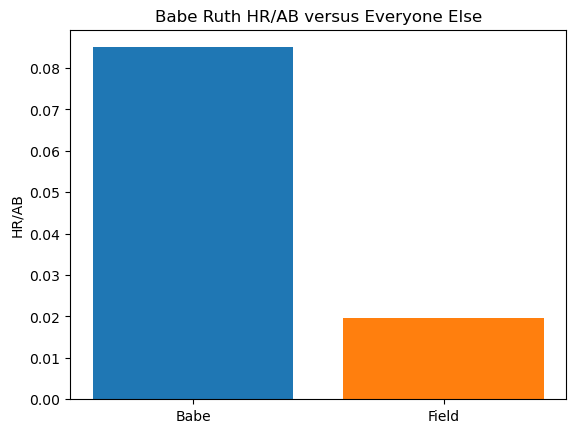

In [179]:
#Babe Ruth
babe_hr_ab = (batting_table.loc[batting_table['playerID'] == babe_ruth_ID]['HR'].sum()/batting_table.loc[batting_table['playerID'] == babe_ruth_ID]['AB'].sum())
#Everyone else
field_hr_ab = (batting_table.loc[batting_table['playerID'] != babe_ruth_ID]['HR'].sum()/batting_table.loc[batting_table['playerID'] != babe_ruth_ID]['AB'].sum())

plt.bar("Babe",babe_hr_ab)
plt.bar("Field",field_hr_ab)
plt.title("Babe Ruth HR/AB versus Everyone Else")
plt.ylabel("HR/AB")
plt.show()


There is so much that can be done to make this a more validated visual. But this is still very funny to look at just to show such a dominance.

#### Same metric with ONLY including players who have made an All Star Game

We need to pull in another table to see who has made an All Star Team.

In [182]:
all_star_table =  pd.read_csv("AllstarFull.csv")
all_star_table.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [192]:
all_star_players_batting = batting_table.loc[batting_table['playerID'].isin(all_star_table['playerID'])]
all_star_players_batting.head()

,playerID,nameFirst,nameLast,yearID,G,AB,R,H,2B,3B,...,SO,IBB,HBP,SH,SF,GIDP,BA,Singles,SLG,OBP
9,aaronha01,Hank,Aaron,1954,122,468.0,58.0,131.0,27.0,6.0,...,39.0,0.0,3.0,6.0,4.0,13.0,0.280,85.0,0.447,0.322
10,aaronha01,Hank,Aaron,1955,153,602.0,105.0,189.0,37.0,9.0,...,61.0,5.0,3.0,7.0,4.0,20.0,0.314,116.0,0.540,0.366
11,aaronha01,Hank,Aaron,1956,153,609.0,106.0,200.0,34.0,14.0,...,54.0,6.0,2.0,5.0,7.0,21.0,0.328,126.0,0.558,0.365
12,aaronha01,Hank,Aaron,1957,151,615.0,118.0,198.0,27.0,6.0,...,58.0,15.0,0.0,0.0,3.0,13.0,0.322,121.0,0.600,0.378
13,aaronha01,Hank,Aaron,1958,153,601.0,109.0,196.0,34.0,4.0,...,49.0,16.0,1.0,0.0,3.0,21.0,0.326,128.0,0.546,0.386


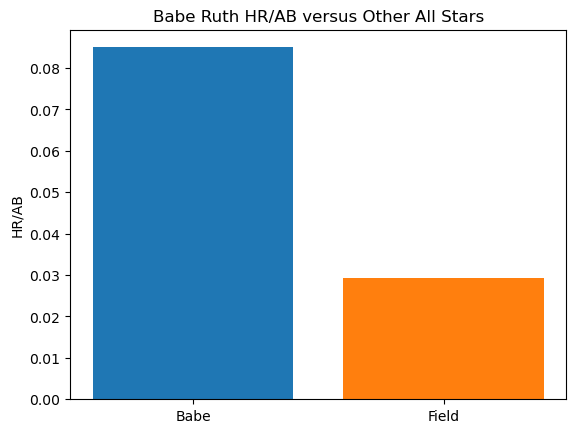

In [202]:
#Babe Ruth
babe_hr_ab = (batting_table.loc[batting_table['playerID'] == babe_ruth_ID]['HR'].sum()/batting_table.loc[batting_table['playerID'] == babe_ruth_ID]['AB'].sum())
#Other All Stars
allstar_hr_ab = (all_star_players_batting.loc[batting_table['playerID'] != babe_ruth_ID]['HR'].sum()/all_star_players_batting.loc[batting_table['playerID'] != babe_ruth_ID]['AB'].sum())

plt.bar("Babe",babe_hr_ab)
plt.bar("Field",allstar_hr_ab)
plt.title("Babe Ruth HR/AB versus Other All Stars")
plt.ylabel("HR/AB")
plt.show()

The dominance is still quite overwhelming!

#### Let's Check the All Time Leaders in this stat to see where Babe Ruth ranks

In [233]:
hrab_df = batting_table[['playerID','HR','AB']]
hrab_df=hrab_df.groupby('playerID').sum()
hrab_df['HR/AB']=hrab_df['HR']/hrab_df['AB']
hrab_df.sort_values(by=['HR/AB'], ascending=False)

,HR,AB,HR/AB
playerID,,,
oconnfr01,1.0,2.0,0.5
bandyje01,1.0,2.0,0.5
worrema01,1.0,2.0,0.5
yanes01,1.0,2.0,0.5
norrida01,1.0,2.0,0.5
...,...,...,...
zimmejo01,0.0,0.0,NaN
zinkch01,0.0,0.0,NaN
zinsebi01,0.0,0.0,NaN


Obviously we don't want to include players with such low number of at bats! Let's set a threshold. The batting title in baseball uses a rule where you need approximately 500 At-bats in a season to qualify. For simplicity let's assume we need 2 "qualifiable" seasons to qualify and set the threshold to 1000. (There are many ways to determine outliers/thresholds/etc but this isn't super important for this step as it is a simple analysis and given our knowledge of baseball, it makes logical sense)

In [234]:
hrab_df = hrab_df.loc[hrab_df['AB'] > 1000]
hrab_df = hrab_df.sort_values(by=['HR/AB'], ascending=False).head(10)

Let's join back up with master table to get player names to pretty up the visual.

In [235]:
hrab_df = pd.merge(hrab_df, master_table, left_on="playerID", right_on="playerID")
hrab_df = hrab_df[['HR/AB','nameFirst','nameLast']]
hrab_df['Name']= hrab_df['nameFirst'] + ' ' + hrab_df['nameLast']
hrab_df

,HR/AB,nameFirst,nameLast,Name
0,0.094230,Mark,McGwire,Mark McGwire
1,0.085020,Babe,Ruth,Babe Ruth
2,0.077384,Barry,Bonds,Barry Bonds
3,0.072667,Jim,Thome,Jim Thome
4,0.070893,Ralph,Kiner,Ralph Kiner
5,0.070510,Giancarlo,Stanton,Giancarlo Stanton
6,0.070333,Harmon,Killebrew,Harmon Killebrew
7,0.069102,Sammy,Sosa,Sammy Sosa
8,0.067610,Ted,Williams,Ted Williams
9,0.067322,Manny,Ramirez,Manny Ramirez


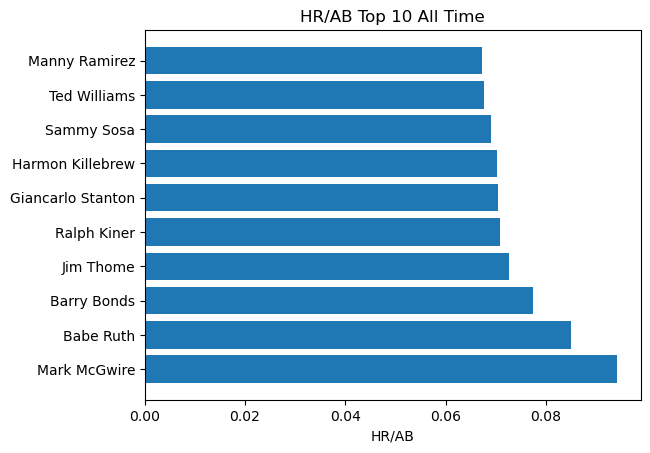

In [240]:
plt.barh(hrab_df['Name'],hrab_df['HR/AB'])
plt.xlabel('HR/AB')
plt.title("HR/AB Top 10 All Time")
plt.show()

Pretty cool to look at! And Babe Ruth sits pretty at #2!

#### The goal thus far is to get you thinking analytically! How can you use the same data to tell different stories? How can you illustrate different points and concepts to prove different points? THINK LIKE A DATA SCIENTIST :)

It is important to note here that "Baseball Knowledge" is clearly useful here. Lesson: Know your data, know your industry!

### Enough of the HR/AB metric! Let's move on!

Feel free to use the information above to create some of your own visuals, tables, etc! 

#### What years did he play?

In [ ]:
babes_career = batting_table.loc[batting_table['playerID']== babe_ruth_ID]
start = babes_career['yearID'].min()
finish = babes_career['yearID'].max()
print(start,"-",finish)

So let's start with just taking those years for now.

In [ ]:
batting_during_babes_career= batting_table.loc[(batting_table['yearID'] >= 1914) & (batting_table['yearID'] <= 1935)]
batting_during_babes_career.head()